 # Доклад про flask
 
 
 
 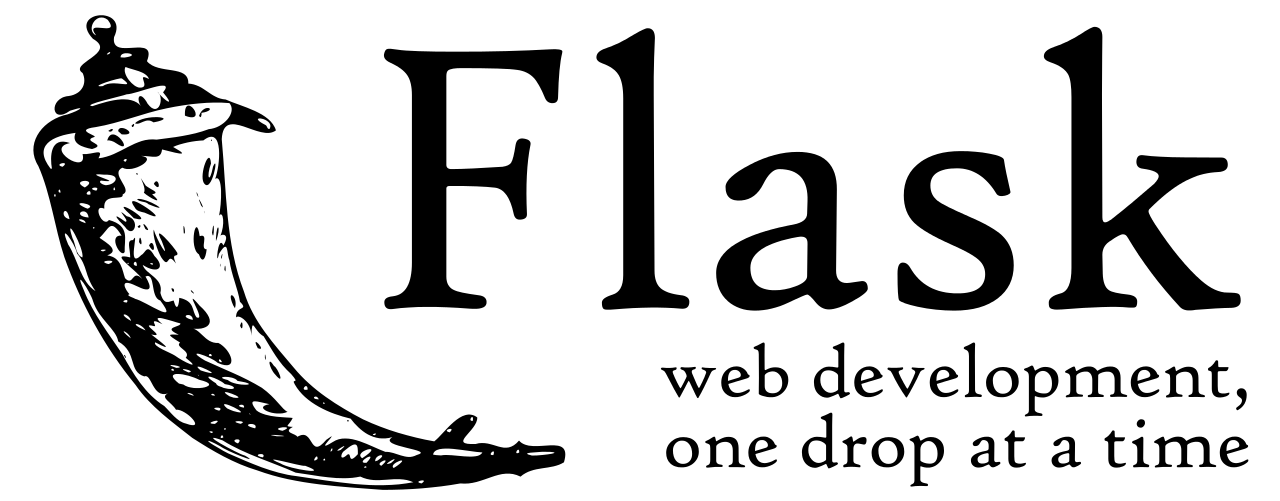

# Flask является микрофреймворком для создания вебсайтов на языке Python.
# Flask в данном контексте переводится как пороховой рожок, на это указывает официальное лого.

# Установка:


# 1. Первая программа, пишем "Hello world!"

In [1]:
from werkzeug.wrappers import Request, Response
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 5000, app)

 * Running on http://localhost:5000/ (Press CTRL+C to quit)


# Чтобы работать с flask в jupyter нужно быть извращенцем. 
# Вот рабочий способ запустить сервер на localhost.

# 2. Структура проекта

# 3. Использование шаблонов

Шаблоны помогают достичь этого разделения между презентацией и бизнес-логикой. В Flask шаблоны записываются как отдельные файлы, хранящиеся в папке templates, которая находится внутри пакета приложения. Поэтому, убедившись, что вы находитесь в каталоге microblog, создайте каталог, в котором будут храниться шаблоны:

Ниже вы можете увидеть свой первый шаблон, который похож по функциональности на страницу HTML, возвращаемую функцией просмотра index() выше. Запишите этот файл в app/templates/index.html:

Это стандартная, очень простая HTML-страница. Единственная интересная вещь на этой странице состоит в том, что для динамического контента есть несколько заполнителей, заключенных в {{...}} разделы. Эти заполнители представляют части страницы, которые являются переменными и будут определены только во время выполнения.


Теперь, когда презентация страницы была выгружена в шаблон HTML, функция просмотра может быть упрощена (файл \app\routes.py):

Как только вы загрузите страницу в свой браузер, вы можете просмотреть исходный HTML-код и сравнить его с исходным шаблоном.


Операция, которая преобразует шаблон в полную HTML-страницу, называется рендерингом. Чтобы отобразить шаблон, мне пришлось импортировать функцию, которая поставляется с флаговой инфраструктурой под названием render_template(). Эта функция принимает имя файла шаблона и переменную список аргументов шаблона и возвращает один и тот же шаблон, но при этом все заполнители в нем заменяются фактическими значениями.


Функция render_template() вызывает механизм шаблонов Jinja2, который поставляется в комплекте с Flask. Jinja2 заменяет блоки {{...}} соответствующими значениями, заданными аргументами, указанными в вызове render_template().

# Условные операторы

Вы видели, как Jinja2 заменяет заполнители фактическими значениями во время рендеринга, но это всего лишь одна из многих мощных операций, поддерживаемых Jinja2 в файлах шаблонов. Например, шаблоны также поддерживают управляющие операторы, заданные внутри блоков {% ...%}. Следующая версия шаблона index.html добавляет условное выражение:

Теперь шаблон немного умнее. Если функция просмотра забывает передать значение переменной заполнитель заголовка, вместо того, чтобы показывать пустой заголовок, шаблон предоставит значение по умолчанию. Вы можете попробовать, как это условие работает, удалив аргумент title в вызове render_template() функции view (файл \app\routes.py).

# Циклы

Пользователь, вошедший в систему, вероятно, захочет увидеть последние сообщения от подключенных пользователей на домашней странице, поэтому теперь я собираюсь расширить приложение, для поддержки этого.


Еще раз, использую трюк с поддельным объектом, чтобы создать некоторых пользователей и некоторые сообщения, для демонстрации:

Для представления пользовательских сообщений я использую список, где каждый элемент является словарем, имеющим поля Author и Body. Когда я доберусь до реализации пользователей и сообщений в блоге по-настоящему, я постараюсь сохранить эти имена полей, чтобы вся работа, которую сделал для проектирования и тестирования шаблона домашней страницы, используя эти временные объекты, продолжала действовать и на момент когда я представляю реальных пользователей и сообщения из базы данных.


На стороне шаблона я должен решить новую проблему. Список сообщений может иметь любое количество элементов. Сколько сообщений будут представлены на странице? Шаблон не может делать какие-либо предположения о том, сколько записей существует, поэтому он должен быть готов к отображению стольких сообщений, сколько отправляет представление общим способом.


Для этого типа проблемы, Jinja2 предлагает for структуры управления (файл app/templates/index.html):

# Наследование шаблонов

В большинстве веб-приложений вверху страницы имеется панель навигации с несколькими часто используемыми ссылками, такими как ссылка для редактирования вашего профиля, логина, выхода из системы и т.д. Я могу легко добавить панель навигации в index.html шаблон с некоторым количеством HTML, но по мере того, как приложение будет расти, мне понадобится эта же панель навигации на других страницах. Не хотелось бы поддерживать несколько копий навигационной панели во многих HTML-шаблонах, это хорошая практика, обходиться без дублирования кода, если это возможно.


Jinja2 имеет функцию наследования шаблона, которая специально решает эту проблему. По существу, вы можете перемещать части макета страницы, которые являются общими для всех шаблонов, к базовому шаблону, из которого выводятся все остальные шаблоны.


Итак, теперь я определяю базовый шаблон base.html, который включает в себя простую навигационную панель, а также логику заголовка, которую я реализовал ранее. Вам необходимо написать следующий шаблон в файле app/templates/base.html:

В этом шаблоне я использовал оператор управления блоком, чтобы определить место, где производные шаблоны могут вставляться. Блокам присваивается уникальное имя, которое производные шаблоны могут ссылаться, когда они предоставляют свой контент.


С базовым шаблоном я теперь могу упростить index.html, наследуя его от base.html:

Поскольку шаблон base.html теперь будет заботиться об общей структуре страницы, я удалил все эти элементы из index.html и оставил только часть содержимого. Оператор extends устанавливает ссылку наследования между двумя шаблонами, так что Jinja2 знает, что когда ему предлагается визуализировать index.html, он должен встроить его в base.html. Два шаблона имеют согласованные операторы block с именами content, и именно так Jinja2 знает, как объединить два шаблона в один. Теперь, если мне нужно создать дополнительные страницы для приложения, я могу создать их как производные шаблоны из одного и того же шаблона base.html, и именно так я могу иметь все страницы приложения, которые будут одинаково выглядеть и выглядеть без дублирования.

# Введение в Flask-WTF

Чтобы обрабатывать веб-формы в этом приложении, я собираюсь использовать расширение Flask-WTF, которое представляет собой обертку пакета WTForms и прекрасно интегрирует его с Flask. Это первое расширение Flask, которое я вам представляю, но не последнее. Расширения являются очень важной частью экосистемы Flask, поскольку они обеспечивают решения проблем.


Расширения Flask — это обычные пакеты Python, которые устанавливаются вместе с pip. Надо установить Flask-WTF в свою виртуальную среду:

# Конфигурация

Пока что приложение очень простое, и по этой причине мне не нужно было беспокоиться о его конфигурации. Но для любых приложений, кроме простейших, вы обнаружите, что Flask (и, возможно, также используемые расширения Flask) предлагают некоторую свободу в том, как делать что-то, и вам нужно принять некоторые решения, которые вы передаете в качестве списка переменных конфигурации.


Для указания параметров конфигурации существует несколько форматов. Самое основное решение — определить ваши переменные как ключи в app.config, который использует стиль словаря для работы с переменными. Например, вы можете сделать что-то вроде этого:

Хотя вышеприведенного синтаксиса достаточно для создания параметров конфигурации для Flask, мне нравится применять принцип разделения проблем, поэтому вместо того, чтобы ставить мою конфигурацию в том же месте, где я создаю свое приложение, я буду использовать несколько более сложную структуру, которая позволяет мне сохранить мою конфигурацию в отдельном файле.


Формат, который мне очень нравится, поскольку он расширяемый, заключается в использовании класса для хранения переменных конфигурации. Чтобы все было хорошо организовано, я собираюсь создать класс конфигурации в отдельном модуле Python. Ниже вы можете увидеть новый класс конфигурации для этого приложения, хранящийся в модуле config.py в каталоге верхнего(!!!) уровня.

Параметры конфигурации определяются как переменные класса внутри класса Config. Поскольку для приложения требуется больше элементов конфигурации, они могут быть добавлены в этот класс, а позже, если я обнаружу, что мне нужно иметь более одного набора конфигурации, я могу создать его подклассы. Но пока об этом не беспокойтесь.


Переменная конфигурации SECRET_KEY, которую я добавил как единственный элемент конфигурации, является важной частью большинства приложений Flask. Flask и некоторые его расширения используют значение секретного ключа в качестве криптографического ключа, полезного для генерации подписей или токенов. Расширение Flask-WTF использует его для защиты веб-форм от противной атаки под названием Cross-Site Request Forgery или CSRF (произносится как «seasurf»). Как следует из его названия, секретный ключ должен быть секретным, поскольку сила токенов и подписей, генерируемых им, зависит от того, что никто за пределами круга доверенных лиц сопровождающих приложения не знает об этом.


Значение секретного ключа задается как выражение с двумя терминами, к которым присоединяется оператор OR. Первый термин ищет значение переменной среды, также называемой SECRET_KEY. Второй термин, это просто жестко закодированная строка. Это шаблон, который вы увидите, что я часто повторяю для конфигурационных переменных. Идея в том, что значение, появляющееся из переменной среды, предпочтительнее, но если среда не определяет переменную, то вместо нее используется жестко закодированная строка. При разработке этого приложения требования к безопасности невелики, поэтому можно просто игнорировать этот параметр и позволить использовать жестко закодированную строку. Но когда это приложение развертывается на рабочем сервере, я буду устанавливать уникальное и трудно угадываемое значение, так что сервер будет иметь безопасный ключ, который никто не знает.


Теперь, когда у меня есть файл конфигурации, мне нужно, чтобы Flask прочитал его и применил. Это можно сделать сразу после создания экземпляра приложения Flask с использованием метода app.config.from_object() (app\__init__.py):

То, как я импортирую класс Config, может показаться запутанным сначала, но если вы посмотрите, как класс Flask (в верхнем регистре «F») импортируется из flask пакета (нижний регистр «f»), вы заметите, что я делаю то же самое с конфигурацией. Строковый «config» — это имя модуля python config.py, и, очевидно, тот, который имеет верхний регистр «C», является фактическим классом.


Как я упоминал выше, элементы конфигурации могут быть доступны со словарным синтаксисом из app.config. Здесь вы можете увидеть быстрый сеанс с интерпретатором Python, где я проверяю, каково значение секретного ключа:

# Форма входа пользователя

Расширение Flask-WTF использует классы Python для представления веб-форм. Класс формы просто определяет поля формы как переменные класса.


Еще раз имея в виду разделение проблем, я собираюсь использовать новый app/forms.py модуль для хранения классов веб-форм. Для начала определим форму входа пользователя, в которой пользователю будет предложено ввести имя пользователя и пароль. Форма также будет включать флажок "Запомнить меня" и кнопку Отправить:

Большинство расширений Flask используют соглашение об именах flask_ для импорта верхнего уровня. В этом случае Flask-WTF меняет все свои символы под flask_wtf. Здесь базовый класс FlaskForm импортируется из верхней части app/forms.py.
Четыре класса, которые представляют типы полей, которые я использую для этой формы, импортируются непосредственно из пакета WTForms, поскольку расширение Flask-WTF не предоставляет настраиваемые версии. Для каждого поля объект создается как переменная класса в классе LoginForm. Каждому полю присваивается описание или метка в качестве первого аргумента.


Дополнительный аргумент validators, который вы видите в некоторых полях, используется для привязки поведения проверки к полям. Валидатор DataRequired просто проверяет, что поле не отправлено пустым. Существует еще много доступных валидаторов, некоторые из которых будут использоваться в других формах.

# Шаблоны форм

Следующим шагом является добавление формы в шаблон HTML, чтобы ее можно было визуализировать на веб-странице. Поля, определенные в классе LoginForm, знают, как визуализировать себя как HTML, поэтому эта задача довольно проста. Ниже вы можете увидеть шаблон входа в систему, который я собираюсь хранить в файле app/templates/login.html:

Для этого шаблона я повторно использую еще один раз base.html, как показано в главе 2, через инструкцию расширенного наследования шаблона. На самом деле я сделаю это со всеми шаблонами, чтобы обеспечить единообразную компоновку, которая включает верхнюю панель навигации по всем страницам приложения.


В этом шаблоне предполагается, что объект формы, созданный из класса LoginForm, будет предоставлен в качестве аргумента, который можно увидеть как ссылку form. Этот аргумент будет отправлен функцией просмотра входа, которую я до сих пор не написал.


Элемент HTML <form> используется в качестве контейнера для веб-формы. Атрибут action формы используется для того, чтобы сообщить веб-браузеру URL-адрес, который должен использоваться при отправке информации, введенной пользователем в форму. Если для действия задана пустая строка, форма передается URL-адресу, находящемуся в данный момент в адресной строке, то есть URL-адресу, который визуализирует форму на странице. Атрибут method указывает метод HTTP-запроса, который должен использоваться при отправке формы на сервер. По умолчанию он отправляется с запросом GET, но почти во всех случаях использование POST запрос, улучшающий взаимодействие с пользователем, поскольку запросы этого типа могут отправлять данные формы в тело запроса, в то время как запросы GET добавляют поля формы к URL-адресу, загромождая адресную строку обозревателя.

# Представление формы


Заключительный шаг перед тем, как вы увидите эту форму в браузере, — это код новой функции просмотра в приложении, которая отображает шаблон из предыдущего раздела.


Итак, давайте напишем новую функцию представления, сопоставленную с URL-адресом /login, которая создаст форму, и передаст её в шаблон для рендеринга. Эта функция просмотра может находиться в модуле app/routes.py дополняя содержимое:

Здесь я импортировал класс LoginForm из forms.py, создал экземпляр объекта из него и отправлял его в шаблон. Синтаксис form = form может выглядеть странно, но просто передает объект формы, созданный в строке выше (и показан справа), в шаблон с формой имени (показан слева). Это все, что требуется для отображения полей формы.


Чтобы упростить доступ к форме входа, базовый шаблон должен включать в себя ссылку на панель навигации:

# Получение данных формы

Первой новинкой в этой версии является аргумент methods в дизайнере маршрутов. Это сообщения для Flask, что эта функция просмотра принимает запросы GET и POST, переопределяя значение по умолчанию, которое должно принимать только запросы GET. Протокол HTTP указывает, что GET-запросы — это те, которые возвращают информацию клиенту (в этом случае веб-браузер). Все запросы в приложении до сих пор относятся к этому типу. Запросы POST обычно используются, когда браузер передает данные формы на сервер (на самом деле запросы GET также могут использоваться для этой цели, но это не рекомендуется). Ошибка «Method Not Allowed», которую браузер показал вам раньше, появляется, потому что браузер попытался отправить запрос POST, и приложение не настроено на его принятие. Предоставляя аргумент methods, вы сообщаете Flask о необходимости принимать методы запроса.


Метод form.validate_on_submit() выполняет всю обработку формы. Когда браузер отправляет запрос GET для получения веб-страницы с формой, этот метод возвращает False, поэтому в этом случае функция пропускает оператор if и переходит к отображению шаблона в последней строке функции.


Когда браузер отправляет запрос POST в результате нажатия пользователем кнопки submit, form.validate_on_submit() собирает все данные, запускает все валидаторы, прикрепленные к полям, и если все в порядке, вернет True, сообща что данные действительны и могут быть обработаны приложением. Но если хотя бы одно поле не подтвердит проверку, функция вернет False, и это приведет к тому, что форма будет возвращена пользователю, например, в случае запроса GET. Позже я собираюсь добавить сообщение об ошибке, когда проверка не удалась.


Когда form.validate_on_submit() возвращает значение True, функция входа в систему вызывает две новые функции, импортированные из Flask. Функция flash() — полезный способ показать сообщение пользователю. Многие приложения используют эту технику, чтобы сообщить пользователю, было ли какое-либо действие успешным или нет. В этом случае я буду использовать этот механизм как временное решение, потому что у меня нет всей инфраструктуры, необходимой для регистрации пользователей в реальности. Лучшее, что я могу сделать сейчас, это показать сообщение, подтверждающее, что приложение получило учетные данные.


Вторая новая функция, используемая в функции входа в систему, — redirect(). Эта функция указывает веб-браузеру клиента автоматически перейти на другую страницу, указанную в качестве аргумента. Эта функция просмотра использует ее для перенаправления пользователя на /index страницу приложения.


Когда вы вызываете функцию flash(), Flask сохраняет сообщение, но на веб-страницах не будут появляться магические сообщения. Шаблоны приложения должны отображать эти свернутые сообщения таким образом, который работает для макета сайта. Я собираюсь добавить эти сообщения в базовый шаблон, чтобы все шаблоны наследовали эту функциональность. Это обновленный базовый шаблон:

Здесь я использую конструкцию with, чтобы назначить результат вызова get_flashed_messages() переменной messages, все в контексте шаблона. Функция get_flashed_messages() поступает из Flask и возвращает список всех сообщений, которые были зарегистрированы в flash() ранее. Условие, которое следует, проверяет, имеет ли сообщение некоторый контент, и в этом случае элемент <ul>отображается с каждым сообщением в виде элемента списка <li>. Этот стиль рендеринга выглядит не очень хорошо, но тема стилизации веб-приложения появится позже.

Интересным свойством этих flash-сообщений является то, что после их запроса один раз через функцию get_flashed_messages они удаляются из списка сообщений, поэтому они появляются только один раз после вызова функции flash().

Время, чтобы попробовать приложение еще раз и проверить, как работает форма. Убедитесь, что вы пытаетесь отправить форму с полями имени пользователя или пароля пустым, чтобы увидеть, как валидатор DataRequired останавливает процесс отправки.

# Базы данных в Flask

Чтобы установить Flask-SQLAlchemy в виртуальную среду, убедитесь, что вы активировали ее сначала, а затем запустите:

# Миграция баз данных

Большинство учебных пособий по базе данных, которые я видел, охватывают создание и использование базы данных, но не позволяют адекватно решить проблему создания обновлений существующей базы данных по мере того, как приложение нуждается в изменении или увеличении. Это сложно, потому что реляционные базы данных сосредоточены вокруг структурированных данных, поэтому при изменении структуры данные, которые уже находятся в базе данных, необходимо перенести в модифицированную структуру.


Второе расширение, которое я собираюсь представить в этой главе, Flask-Migrate, который фактически созданный вашим покорным слугой. Это расширение является Flask-оберткой для Alembic, основой для миграции базы данных SQLAlchemy. Работа с миграциями баз данных добавляет немного работы вначале, но это небольшая цена, чтобы заплатить за надежный способ внесения изменений в вашу базу данных в будущем.


Процесс установки для Flask-Migrate аналогичен другим расширениям, которые вы видели:

# Конфигурация Flask-SQLAlchemy

Во время разработки я собираюсь использовать базу данных SQLite. Базы данных SQLite являются наиболее удобным выбором для разработки небольших приложений, иногда даже не очень маленьких, так как каждая база данных хранится в одном файле на диске и нет необходимости запускать сервер баз данных, как MySQL и PostgreSQL.


У нас есть два новых элемента конфигурации для добавления в файл конфигурации:

Расширение Flask-SQLAlchemy принимает местоположение базы данных приложения из переменной конфигурации SQLALCHEMY_DATABASE_URI. Как вы помните из главы 3, в целом рекомендуется установить конфигурацию из переменных среды и предоставить резервное значение, когда среда не определяет переменную. В этом случае я беру URL-адрес базы данных из переменной среды DATABASE_URL, и если это не определено, я настраиваю базу данных с именем app.db, расположенную в основном каталоге приложения, которая хранится в переменной basedir.


Параметр конфигурации SQLALCHEMY_TRACK_MODIFICATIONS установлен в значение False, чтобы отключить функцию Flask-SQLAlchemy, которая мне не нужна, которая должна сигнализировать приложению каждый раз, когда в базе данных должно быть внесено изменение.


База данных будет представлена ​​в приложении, как database instance. Механизм миграции базы данных также будет иметь экземпляр. Это объекты, которые необходимо создать после приложения, в файле app/__ init__.py:

# Модели баз данных

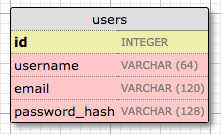

Поле id обычно используется во всех моделях и используется как первичный ключ. Каждому пользователю в базе данных будет присвоено уникальное значение идентификатора, сохраненное в этом поле. Первичные ключи в большинстве случаев автоматически назначаются базой данных, поэтому мне просто нужно указать поле id, помеченное как первичный ключ.


Поля username, email и password_hash определяются как строки (или VARCHAR на жаргоне базы данных), а их максимальная длина указывается так, чтобы база данных могла оптимизировать использование пространства. Хотя поля username и email не требуют пояснений, поля password_hash заслуживают внимания. Я хочу убедиться, что приложение, которое я создаю, использует лучшие рекомендации по безопасности, и по этой причине я не буду хранить пароли пользователей в базе данных. Проблема с хранением паролей заключается в том, что если база данных когда-либо становится скомпрометированной, злоумышленники будут иметь доступ к паролям, и это может быть разрушительным для пользователей. Вместо того, чтобы писать пароли напрямую, я собираюсь написать хэши паролей (password hashes), которые значительно улучшают безопасность. Это будет тема другой главы, так что не беспокойтесь об этом сейчас.


Итак, теперь, когда я знаю, что мне нужно для таблицы моих пользователей, я могу перевести это в код в новом модуле app/models.py:

Созданный выше класс User наследует от db.Model, базового класса для всех моделей из Flask-SQLAlchemy. Этот класс определяет несколько полей как переменные класса. Поля создаются как экземпляры класса db.Column, который принимает тип поля в качестве аргумента, плюс другие необязательные аргументы, которые, например, позволяют мне указать, какие поля уникальны и индексированы, что важно для эффективного поиска базы данных ,


Метод __repr__ сообщает Python, как печатать объекты этого класса, что будет полезно для отладки. Вы можете увидеть метод __repr __() в действии в сеансе интерпретатора Python ниже:

# Создание миграции репозитория

Класс модели, созданный в предыдущем разделе, определяет исходную структуру (или схему) базы данных для этого приложения. Но по мере того, как приложение продолжает расти, потребуется изменить структуру, которая, скорее всего, добавит новые сущности, но иногда также может изменять или удалять элементы. Alembic (инфраструктура миграции, используемая Flask-Migrate) сделает эти изменения схемы таким образом, чтобы не требовалось воссоздавать базу данных с нуля.


Чтобы выполнить эту, казалось бы, сложную задачу, Alembic поддерживает репозиторий миграции, который является каталогом, в котором хранится его сценарии миграции. Каждый раз, когда в схему базы данных вносится изменение, в репозиторий добавляется сценарий миграции с подробными сведениями об изменении. Чтобы применить миграции к базе данных, эти сценарии миграции выполняются в той последовательности, в которой они были созданы.


Flask-Migrate выдает свои команды через flask команду. Вы уже видели flask run, который является подчиненной командой, которая является родной для Flask. Подкоманда flask db добавляется Flask-Migrate для управления всем, что связано с миграцией базы данных. Итак, давайте создадим репозиторий миграции для microblog, запустивflask db init:

# Первая миграция базы данных

При наличии репозитория миграции настало время создать первую миграцию базы данных, которая будет включать таблицу Users, сопоставляемую с моделью пользовательской базы данных. Существует два способа создания миграции базы данных: вручную или автоматически. Для автоматического создания миграции Alembic сравнивает схему базы данных, определенную моделями баз данных, с фактической схемой базы данных, используемой в настоящее время в базе данных. Затем он заполняет сценарий переноса изменениями, необходимыми для того, чтобы схема базы данных соответствовала моделям приложений. В этом случае, поскольку нет предыдущей базы данных, автоматический перенос добавит всю User модель в сценарий переноса. flask db migrate Подкоманда переноса DB генерирует эти автоматические миграции:

Вывод команды дает вам представление о том, что Alembic включен в миграцию. Первые две строки являются информационными и их обычно можно игнорировать. Затем он говорит, что нашел таблицу 'user' и два индекса '['email']' и '['username']'. Затем он сообщает вам, где он написал сценарий миграции. Код e517276bb1c2 — это автоматически созданный уникальный код для миграции (он будет другим для вас). Комментарий, заданный с параметром -m, является необязательным, он добавляет короткий описательный текст в перенос.


Сгенерированный сценарий миграции теперь является частью вашего проекта и должен быть включен в систему управления версиями. Вы можете просмотреть сценарий, если вам интересно посмотреть, как он выглядит. Вы обнаружите, что у него есть две функции: upgrade() и downgrade(). Функция upgrade() применяет миграцию, а функция downgrade() удаляет ее. Это позволяет Alembic переносить базу данных в любую точку истории, даже в более старые версии, используя путь понижения.


Команда flask db migrate не вносит никаких изменений в базу данных, она просто создает сценарий миграции. Чтобы применить изменения в базе данных, необходимо использовать команду flask db upgrade.

Поскольку это приложение использует SQLite, команда Upgrade обнаружит, что база данных не существует и создаст ее (вы заметите, что файл с именем app.db будет добавлен после завершения этой команды, то есть базы данных SQLite). При работе с серверами баз данных, такими как MySQL и PostgreSQL, перед запуском обновления необходимо создать базу данных на сервере базы данных.

# Процесс обновления базы данных и откатка изменений Upgrade и Downgrade

На данный момент приложение находится в зачаточном состоянии, но это не помешает обсудить, что будет в стратегии миграции базы данных в будущем. Представьте, что у вас есть приложение на вашей машине разработки, а также есть копия, развернутая на производственный сервер, который находится в сети и используется.


Предположим, что для следующей версии вашего приложения вам нужно внести изменения в свои модели, например, нужно добавить новую таблицу. Без миграции вам нужно будет выяснить, как изменить схему вашей базы данных, как на локальном хосте, так и на вашем сервере, и это может быть большой проблемой.


Но с поддержкой миграции базы данных, после изменения моделей в приложении вы создаете новый сценарий миграции ( flask db migrate ), вы, вероятно, просмотрите его, чтобы убедиться, что автоматическое создание сделало правильные вещи, а затем примените изменения в базе данных разработки ( flask db upgrade ). Вы добавите сценарий миграции в систему управления версиями и зафиксируете его.


Когда вы будете готовы выпустить новую версию приложения на свой production сервер, все, что вам нужно сделать, это захватить обновленную версию приложения, которая будет включать в себя новый сценарий миграции и запустить flask db upgrade. Alembic обнаружит, что база данных не обновлена до последней редакции, и выполнит все новые сценарии миграции, созданные после предыдущего выпуска.


Как я упоминал ранее, у вас также есть команда downgrade flask db, которая отменяет последнюю миграции. Хотя вам вряд ли понадобится этот вариант в момент рабочей эксплуатации, Вы можете найти его очень полезным во время разработки. Возможно, вы сгенерировали сценарий миграции и применили его, только чтобы обнаружить, что внесенные изменения не совсем то, что вам нужно. В этом случае можно понизить рейтинг базы данных, удалить сценарий миграции, а затем создать новый, чтобы заменить его.

# Связи базы данных

Реляционные базы данных хороши в хранении связей между элементами данных. Рассмотрим случай, когда пользователь пишет сообщение в блоге. Пользователь будет иметь запись в таблице пользователей, и сообщение будет иметь запись в таблице сообщений. Самый эффективный способ записать кто написал данное сообщение, — связать две записи.


После того, как установлена связь между пользователем и постом, есть два типа запросов, которые нам могут понадобиться. Самый тривиальный, когда у вас есть пост и нужно знать кто из пользователей его написал. Чуть более сложный вопрос является обратным этому. Если у вас есть пользователь, то вам может понадобиться получить все написанные им записи. Flask-SQLAlchemy поможет нам с обоими типами запросов.


Расширим нашу базу для хранения постов, чтобы мы могли увидеть связи в действии. Для этого мы вернемся к нашему инструменту дизайна БД и создадим таблицу записей:

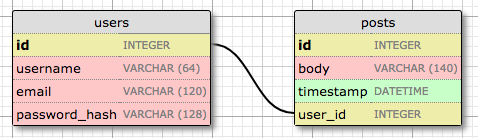

Таблица Сообщений будет иметь необходимый идентификатор, текст сообщения и метку времени. Но в дополнение к этим ожидаемым полям я добавляю поле user_id, которое связывает сообщение с его автором. Вы видели, что у всех пользователей есть первичный ключ id, который уникален. Способ связать запись блога с пользователем, который ее создал, — добавить ссылку на идентификатор пользователя, и это именно то, что является полем user_id. Это поле user_id называется внешним ключом (англ. foreign key). На приведенной выше схеме базы данных внешние ключи отображаются как связь между полем и полем id таблицы, на которую он ссылается. Такого рода отношения называется один ко многим, потому что "один" пользователь пишет "много" Сообщений.


Измененный app/models.py показан ниже:

Новый класс Post будет представлять записи в блогах, написанные пользователями. Поле timestamp будет проиндексировано, что полезно, если вы хотите получить сообщения в хронологическом порядке. Я также добавил аргумент по умолчанию и передал функцию datetime.utcnow. Когда вы передаете функцию по умолчанию, SQLAlchemy установит для поля значение вызова этой функции (обратите внимание, что я не включил () после utcnow, поэтому я передаю эту функцию сам, а не результат ее вызова ). В общем, это позволит работать с датами и временем UTC в серверном приложении. Это гарантирует, что вы используете единые временные метки независимо от того, где находятся пользователи. Эти временные метки будут преобразованы в локальное время пользователя, когда они будут отображаться.


Поле user_id было инициализировано как внешний ключ для user.id, что означает, что оно ссылается на значение id из таблицы users. В этой ссылке user — это имя таблицы базы данных, которую Flask-SQLAlchemy автоматически устанавливает как имя класса модели, преобразованного в нижний регистр. Класс User имеет новое поле сообщений, которое инициализируется db.relationship. Это не фактическое поле базы данных, а высокоуровневое представление о взаимоотношениях между users и posts, и по этой причине оно не находится в диаграмме базы данных. Для отношения «один ко многим» поле db.relationship обычно определяется на стороне «один» и используется как удобный способ получить доступ к «многим». Так, например, если у меня есть пользователь, хранящийся в u, выражение u.posts будет запускать запрос базы данных, который возвращает все записи, написанные этим пользователем. Первый аргумент db.relationship указывает класс, который представляет сторону отношения «много». Аргумент backref определяет имя поля, которое будет добавлено к объектам класса «много», который указывает на объект «один». Это добавит выражение post.author, которое вернет автора сообщения. Аргумент lazy определяет, как будет выполняться запрос базы данных для связи, о чем я расскажу позже. Не беспокойтесь, если эти детали не имеют для вас смысла, я покажу примеры в конце этой статьи.


Поскольку у меня есть обновления для моделей приложений, необходимо создать новую миграцию базы данных:

И миграция должна быть применена к базе данных:

Если проект хранится в системе управления версиями, не забудьте добавить в него новый сценарий миграции.